In [1]:
## PRELIMINARIES ##
%load_ext autoreload
%autoreload 2

from IPython.display import HTML
from IPython.display import Javascript
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
# Python imports
import sys
sys.path.append('../')
import glob

In [3]:
# Rankutils imports
from rankutils.cfgloader import *
from rankutils.utilities import safe_create_dir, completedir, getbasename
from rankutils.rIO import read_rank
from rankutils.drawing import colors_from_cmap, rank_plot

In [4]:
# Other imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3

from sklearn.preprocessing import MinMaxScaler

In [5]:
pathcfg = cfgloader('../path_2.cfg')

In [6]:
expkey = 'places365_001'
k = 10
f = 0.0
z = 1.0
l = 101
m = 100
iidx = 19
score_type = 'dists'   # Controls type of score to be read from rank

In [7]:
# Loading useful files according to definitions
rkflist = glob.glob(pathcfg.get(expkey, 'rank') + "*.rk")
rkflist.sort()
rkfpath = rkflist[iidx]
rkname = getbasename(rkfpath)
rank = read_rank(rkfpath)

labelpath = glob.glob("{0:s}*{1:s}*".format(pathcfg.get(expkey, 'label'), pathcfg.get(expkey, 'rktpdir')))[0]
labels = np.load(labelpath)

collmpath = glob.glob("{0:s}*{1:s}*".format(pathcfg.get(expkey, 'collmatches'), pathcfg.get(expkey, 'rktpdir')))[0]
collm = np.load(collmpath)

namelist = np.loadtxt(pathcfg.get(expkey, 'namelist'), usecols=0, dtype='U100')

In [8]:
def iou(a, b):
    
    intersect = np.intersect1d(a, b)
    union = np.union1d(a, b)
    
    return intersect.size/union.size

**Loading and drawing the rank**

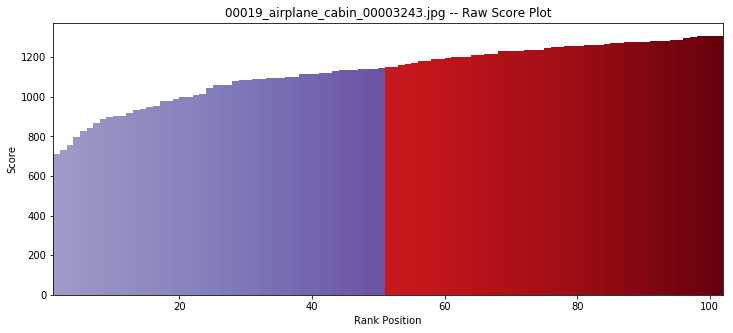

In [9]:
fig, ax = plt.subplots(1)
fig.set_size_inches(12, 5)

rank_plot(rank['score'][1:], k, ax, title='{0:s} -- Raw Score Plot'.format(rkname), **dict(start=1, limit=l))

**Scale between 0.0 and 1.0**

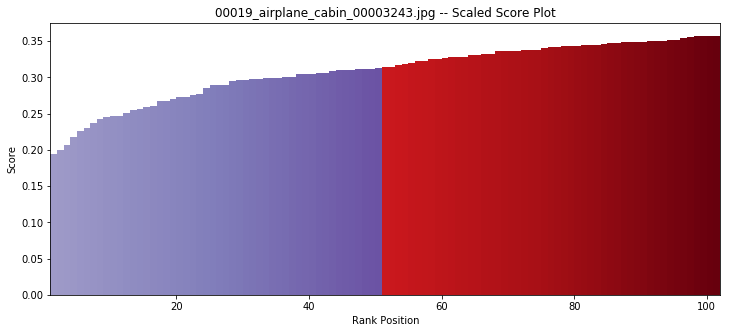

In [10]:
minmaxscaler = MinMaxScaler((0, 1))

rank_s = minmaxscaler.fit_transform(rank['score'].reshape(-1, 1)).reshape(-1)

fig, ax = plt.subplots(1)
fig.set_size_inches(12, 5)

rank_plot(rank_s[1:], k, ax, title='{0:s} -- Scaled Score Plot'.format(rkname), **dict(start=1, limit=l))

**Convert to similarity**

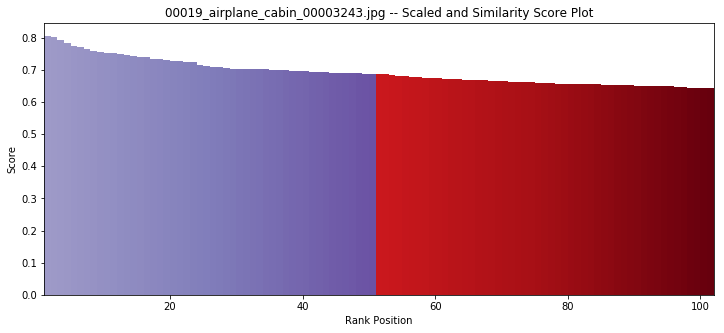

In [11]:
rank_c = 1.0 - rank_s

fig, ax = plt.subplots(1)
fig.set_size_inches(12, 5)

rank_plot(rank_c[1:], k, ax, title='{0:s} -- Scaled and Similarity Score Plot'.format(rkname), **dict(start=1, limit=l))

**Difference plot**

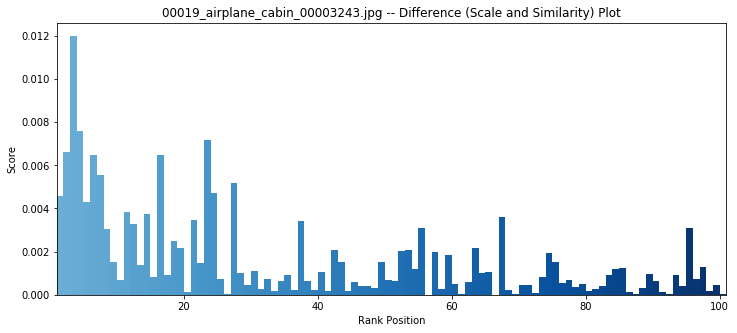

In [12]:
diff = rank_c[1:-1] - rank_c[2:]

fig, ax = plt.subplots(1)
fig.set_size_inches(12, 5)

np.set_printoptions(suppress=True, precision=10)

rank_plot(diff, 0, ax, title='{0:s} -- Difference (Scale and Similarity) Plot'.format(rkname), 
          **dict(start=1, limit=100, cmaptail='Blues'))

**Difference map**

Text(0, 0.5, 'Abs Diff')

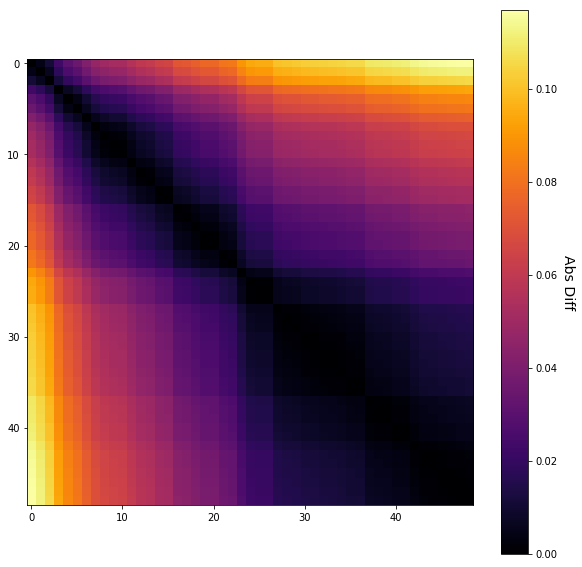

In [13]:
# diff_map = np.abs(rank_c[1:k].reshape(-1, 1) - rank_c[1:k].reshape(1, -1))
# diff_map_s = minmaxscaler.fit_transform(diff_map.reshape(-1, 1)).reshape(diff_map.shape)

# fig, ax = plt.subplots(1)
# fig.set_size_inches(10, 10)

# im = ax.imshow(diff_map, plt.get_cmap('inferno'))
# cbar = ax.figure.colorbar(im)
# cbar.ax.set_ylabel('Abs Diff', rotation=-90, va="bottom", fontdict=dict(fontsize=14))

**Label plot**

[1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 0 1]


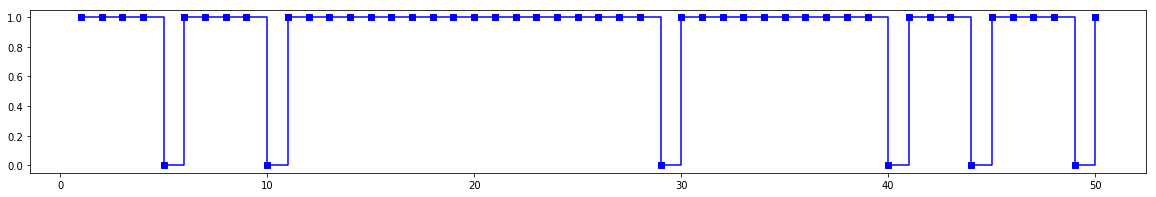

In [14]:
# fig, ax = plt.subplots(1)
# fig.set_size_inches(20, 3)

# l = labels[iidx][0:k]
# x = np.arange(1, l.size+1, 1)

# print(l[0:k])
# plt.step(x, l, color='blue', marker='s', where='post', label='post')
# #plt.plot(x, l, color='blue', marker='s')

**Intersection Map**

Text(0, 0.5, 'Top-50 IOU')

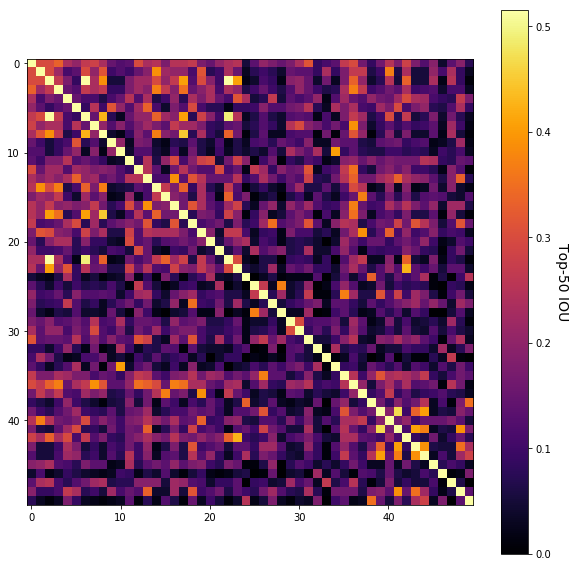

In [15]:
# top_idx = np.searchsorted(namelist, rank['name'][0:k])
# top_idx_array = collm[top_idx, 0:k]

# #print(top_idx)
# #print(top_idx_array)

# #print(l[0:10])

# iou_map = np.zeros((top_idx_array.shape[0], top_idx_array.shape[0]), dtype=np.float64)
# for i, row in enumerate(top_idx_array):
#     iou_map[i] = np.apply_along_axis(iou, axis=1, arr=top_idx_array, **dict(b=row))

# v = np.unique(iou_map)[-2]
    
# fig, ax = plt.subplots(1)
# fig.set_size_inches(10, 10)

# im = ax.imshow(iou_map, plt.get_cmap('inferno'), vmax=v)
# cbar = ax.figure.colorbar(im)
# cbar.ax.set_ylabel('Top-{0:d} IOU'.format(k), rotation=-90, va="bottom", fontdict=dict(fontsize=14))

Text(0.5, 1.0, 'Top-50 Relevance')

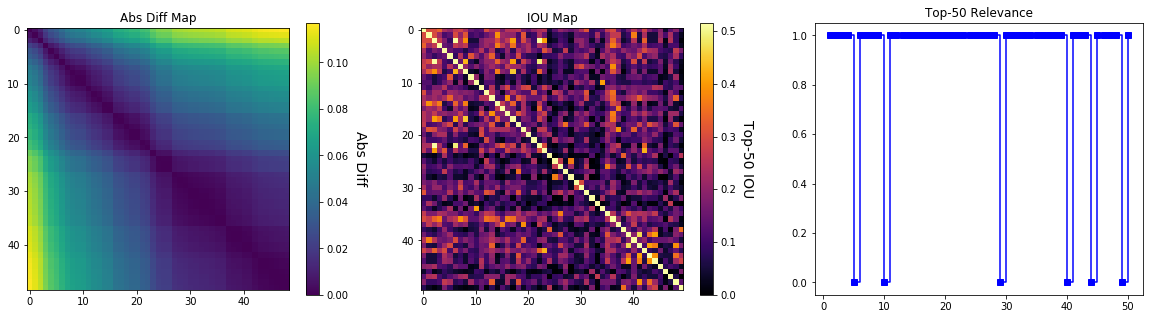

In [16]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(20, 5)

im = ax[0].imshow(diff_map, plt.get_cmap('viridis'))
cbar = fig.colorbar(im, ax=ax[0])
cbar.ax.set_ylabel('Abs Diff', rotation=-90, va="bottom", fontdict=dict(fontsize=14))
ax[0].set_title('Abs Diff Map')

im = ax[1].imshow(iou_map, plt.get_cmap('inferno'), vmax=v)
cbar = fig.colorbar(im, ax=ax[1])
cbar.ax.set_ylabel('Top-{0:d} IOU'.format(k), rotation=-90, va="bottom", fontdict=dict(fontsize=14))
ax[1].set_title('IOU Map')

ax[2].step(x, l, color='blue', marker='s', where='post', label='post')
ax[2].set_title('Top-{0:d} Relevance'.format(k))